In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/HR-Employee-Attrition.csv")
df


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,1.0,...,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
1,49,No,Travel_Frequently,279.0,Research & Development,8.0,1.0,Life Sciences,1.0,2.0,...,4.0,80.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0
2,37,Yes,Travel_Rarely,1373.0,Research & Development,2.0,2.0,Other,1.0,4.0,...,2.0,80.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0
3,33,No,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,1.0,5.0,...,3.0,80.0,0.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0
4,27,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,7.0,...,4.0,80.0,1.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,# Improved visualization layout on 04 Jul 2024,15:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1472,# Enhanced prediction accuracy on 13 Jul 2024,12:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1473,# Improved feature engineering steps on 14 Jul...,14:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1474,# Enhanced prediction accuracy on 26 Jul 2024,10:09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

# Display the first 5 rows
print ("First 5 rows of the DataFrame:")
print(df.head())

# Print concise summary of the DataFrame
print("\nDataFrame Info:")

# Generate descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())



First 5 rows of the DataFrame:
  Age Attrition     BusinessTravel  DailyRate              Department  \
0  41       Yes      Travel_Rarely     1102.0                   Sales   
1  49        No  Travel_Frequently      279.0  Research & Development   
2  37       Yes      Travel_Rarely     1373.0  Research & Development   
3  33        No  Travel_Frequently     1392.0  Research & Development   
4  27        No      Travel_Rarely      591.0  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0               1.0        2.0  Life Sciences            1.0             1.0   
1               8.0        1.0  Life Sciences            1.0             2.0   
2               2.0        2.0          Other            1.0             4.0   
3               3.0        4.0  Life Sciences            1.0             5.0   
4               2.0        1.0        Medical            1.0             7.0   

   ...  RelationshipSatisfaction StandardHours  S

In [ ]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum()/len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Count' : missing_values,
    'Missing Percentage (%)' : missing_percentage
  })

missing_info = missing_info[missing_info['Missing Count']> 0].sort_values(by='Missing Count', ascending=False)

print("\nMissing Values and their Percentage:")
print(missing_info)


Missing Values and their Percentage:
                          Missing Count  Missing Percentage (%)
BusinessTravel                        6                0.406504
DailyRate                             6                0.406504
Department                            6                0.406504
DistanceFromHome                      6                0.406504
Education                             6                0.406504
EducationField                        6                0.406504
EmployeeCount                         6                0.406504
EmployeeNumber                        6                0.406504
EnvironmentSatisfaction               6                0.406504
Gender                                6                0.406504
HourlyRate                            6                0.406504
JobInvolvement                        6                0.406504
JobLevel                              6                0.406504
JobRole                               6                0.406504
Jo

In [ ]:
df.dropna(inplace=True)

# Verify that all missing values have been handled
print("\nMissing values after dropping rows:")
print(df.isnull().sum().sum())


Missing values after dropping rows:
0


In [ ]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

print("Number of non-numeric 'Age' entries converted to NaN:")
print(df['Age'].isnull().sum())

# Display rows where Age is NaN to inspect problematic entries, if any
if df['Age'].isnull().any():
  print("\nRows with problematic 'Age' entries:")
  print(df[df['Age'].isnull()])

  # For this dataset, if any, we'll drop them since the percentage is likely vey samll or none
  original_rows = len(df)
  df.dropna(subset=['Age'], inplace=True)
  print(f"\nDropped {original_rows - len(df)} rows with NaN in 'Age' column.")

print("\nUpdated DataFramr Info after Age conversion:")
df.info()

Number of non-numeric 'Age' entries converted to NaN:
0

Updated DataFramr Info after Age conversion:
<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   float64
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   float64
 6   Education                 1470 non-null   float64
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   float64
 9   EmployeeNumber            1470 non-null   float64
 10  EnvironmentSatisfaction   1470 non-null   float64
 11  Gender                    1470 non-null   object 
 12  HourlyRate           

In [ ]:
if 'EmployeeCount' in df.columns:
  print("Unique values for 'EmployeeCount':",df['EmployeeCount'].unique())
if 'StandardHours' in df.columns:
  print("Unique values for 'StandardHours':",df['StandardHours'].unique())

# Drop 'EmployeeCount' and 'StandardHours' columns if they are constant
if 'EmployeeCount' in df.columns and df['EmployeeCount'].nunique() ==1:
  df.drop('EmployeeCount', axis=1, inplace=True)
  print("'EmployeeCount' column dropped as it contains only one unique value.")
if 'StandardHours' in df.columns and df['StandardHours'].nunique() ==1:
  df.drop('StandardHours',axis=1, inplace=True)
  print("'StandardHours' column dropped as it contains only one unique value.")


# Check for other columns that might need type conversion (numerical stored as object)
# Get object columns that might contain numerical data
object_cols = df.select_dtypes(include='object').columns
for col in object_cols:
  # Try converting to numeric, coercing errors.If successful and there are no NaNs after conversion,keep it.
  converted_col = pd.to_numeric(df[col],errors='coerce')
  if not converted_col.isnull().any() and not pd.api.types.is_numeric_dtype(df[col]):
    df[col]= converted_col
    print(f"Converted '{col}'to numeric type.")


# Display updated info and descriptive statistics to check for outliers/anomalies in numerical columns
print("\nUpdated DataFrame Info:")
df.info()
print("\nDescriptive Statistics for numerical columns after cleaning:")
print(df.describe())

Unique values for 'EmployeeCount': [1.]
Unique values for 'StandardHours': [80.]
'EmployeeCount' column dropped as it contains only one unique value.
'StandardHours' column dropped as it contains only one unique value.

Updated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   float64
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   float64
 6   Education                 1470 non-null   float64
 7   EducationField            1470 non-null   object 
 8   EmployeeNumber            1470 non-null   float64
 9   EnvironmentSatisfaction   1470 non-null   fl

In [ ]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64','float64']).columns

print(f"Identified {len(numerical_cols)} numerical columns univariate analysis.")
print("Numerical columns:", numerical_cols.tolist())

Identified 24 numerical columns univariate analysis.
Numerical columns: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


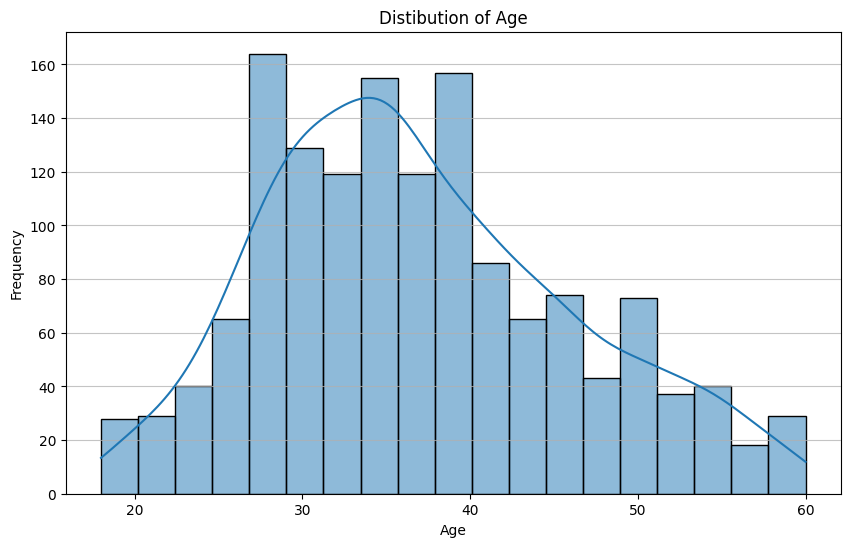

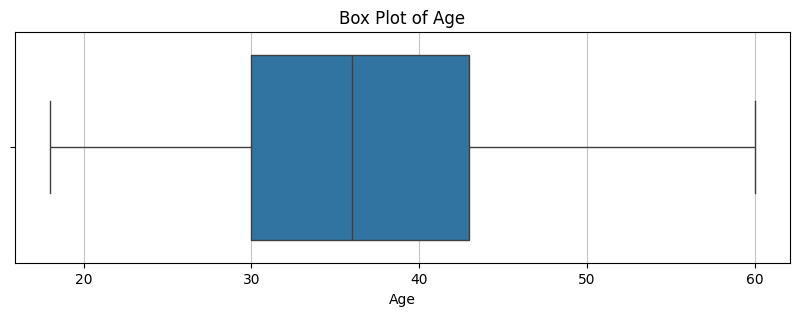

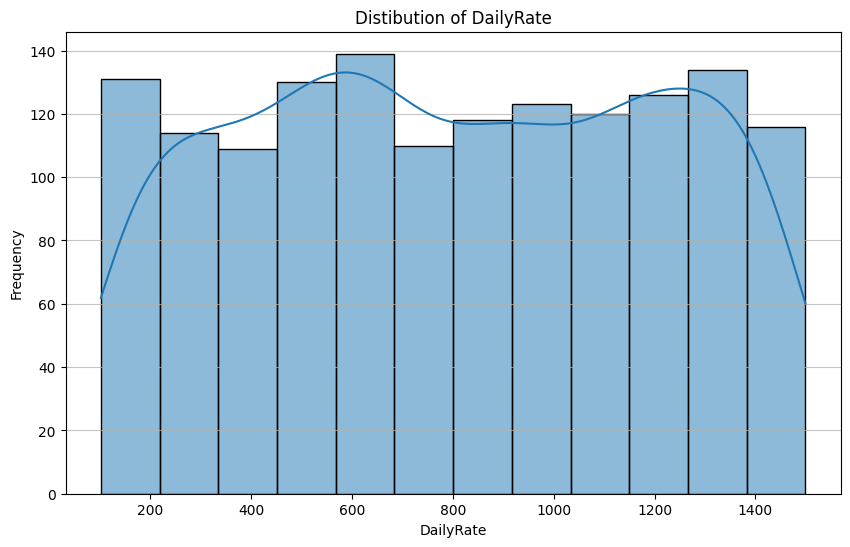

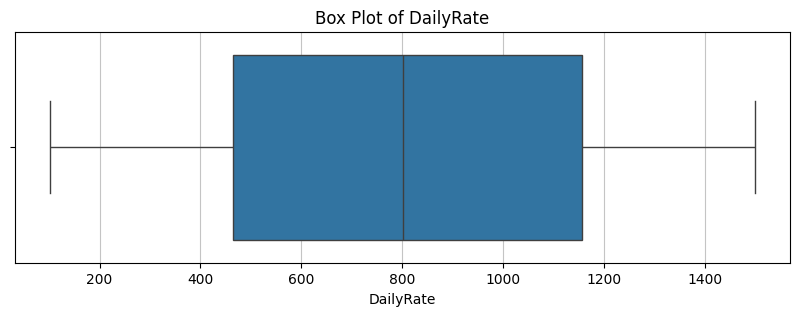

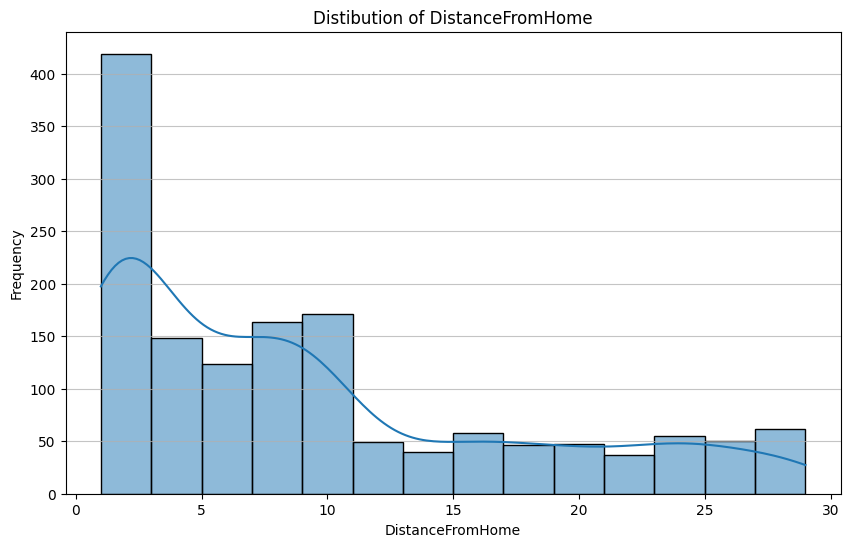

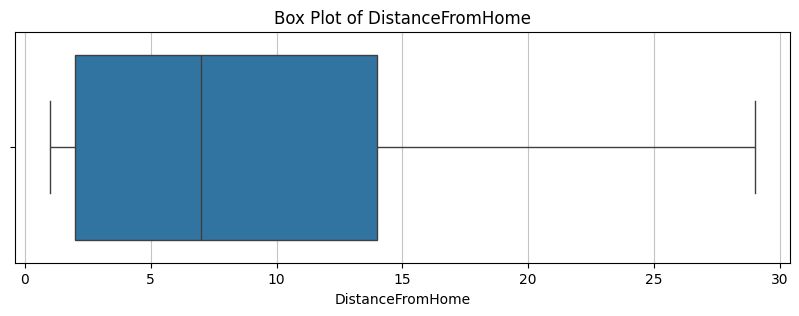

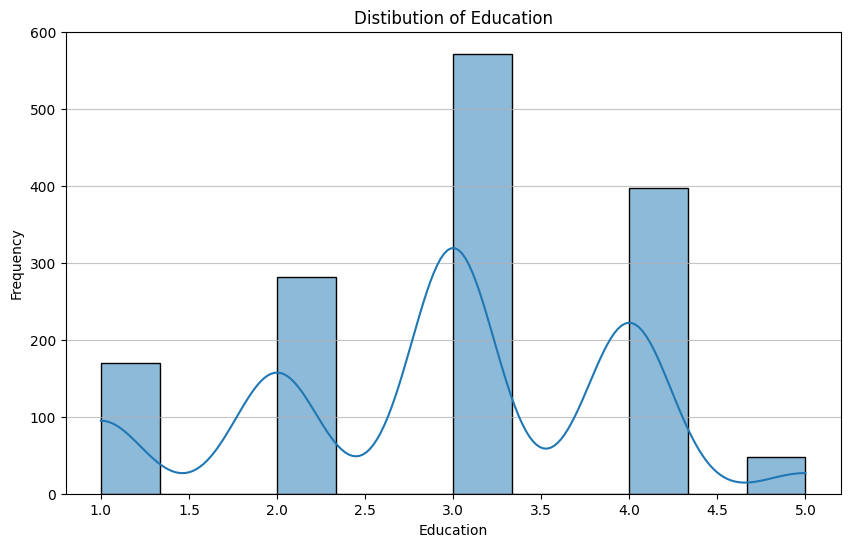

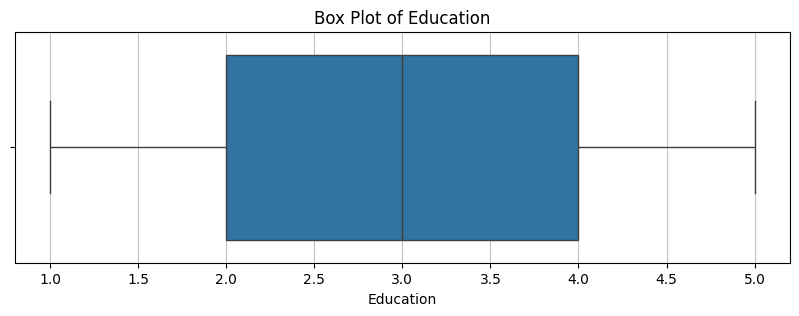

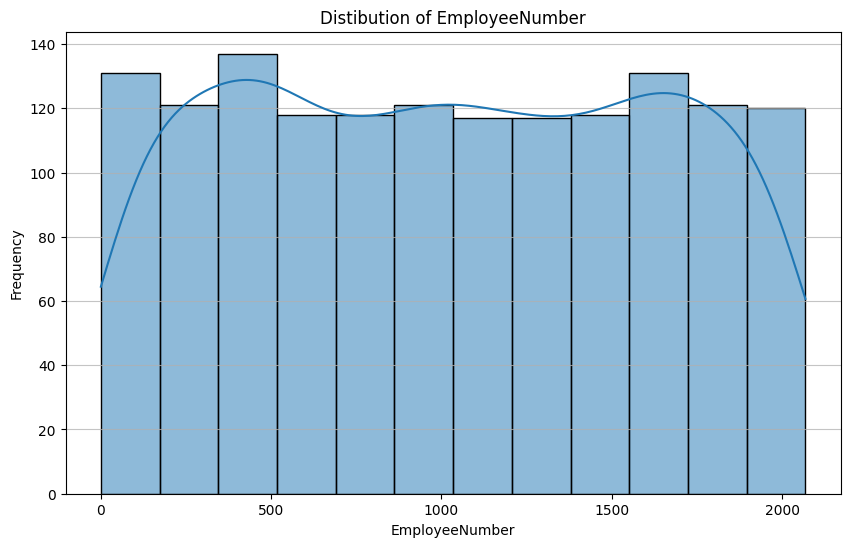

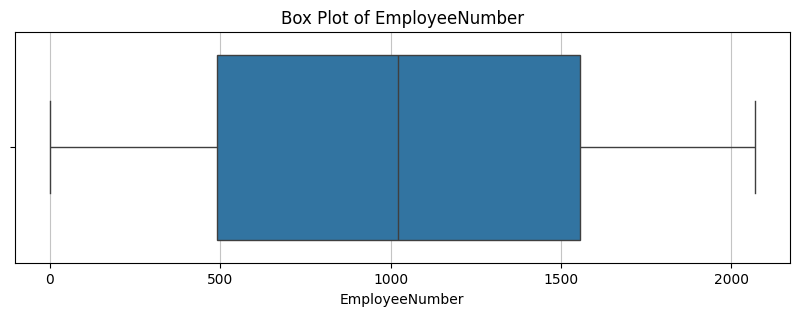

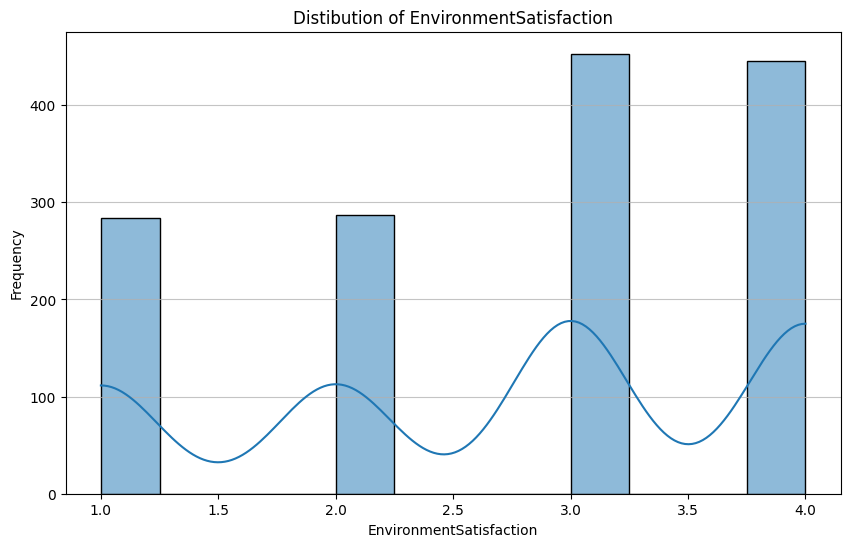

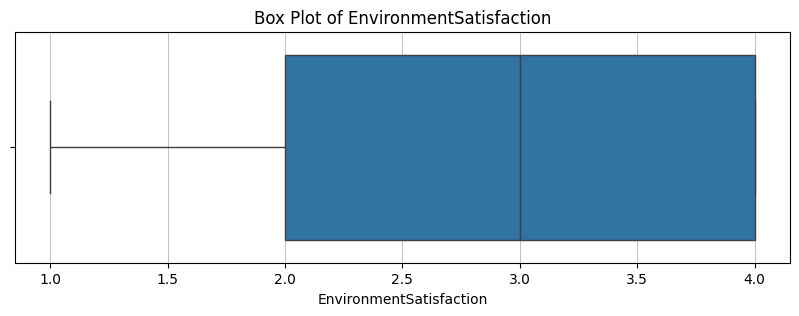

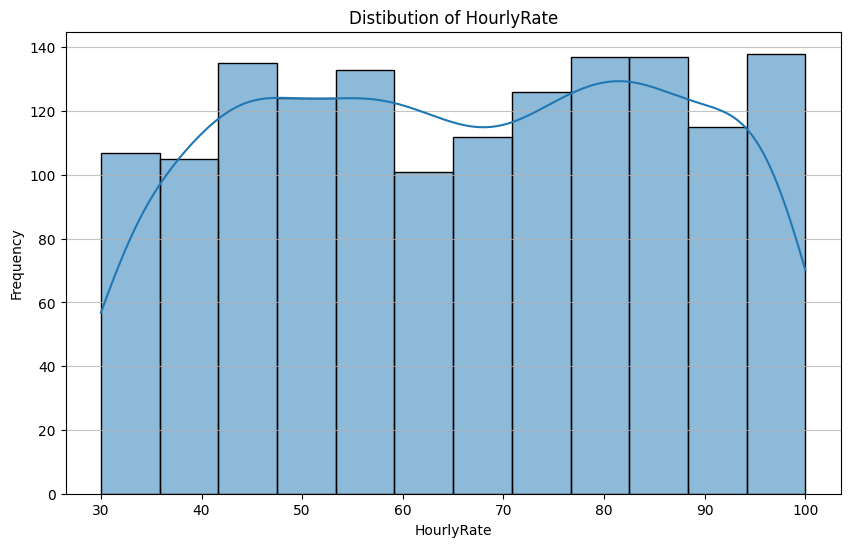

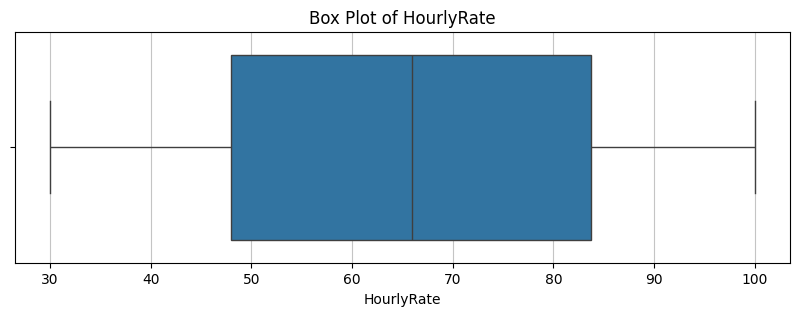

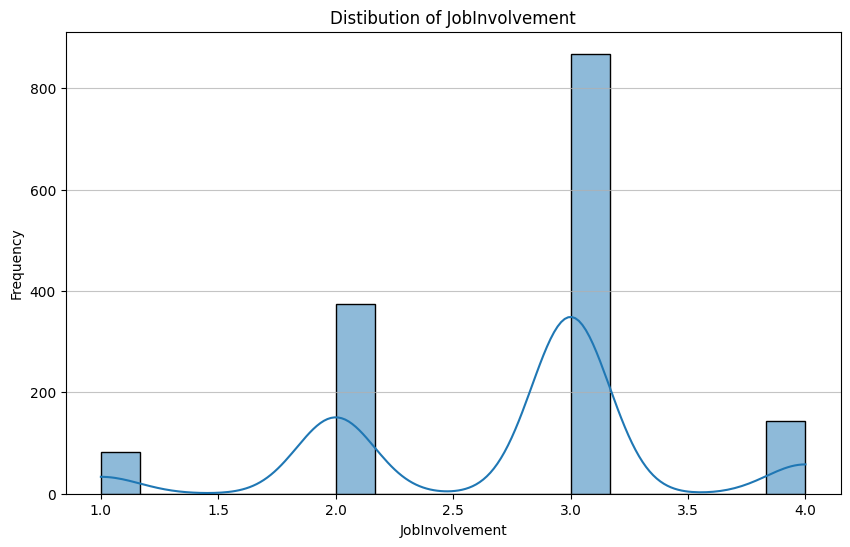

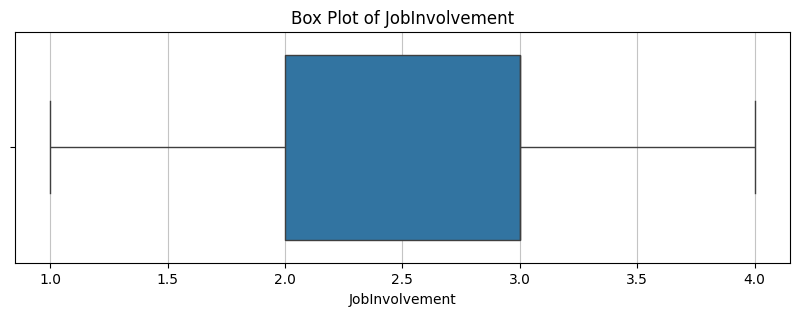

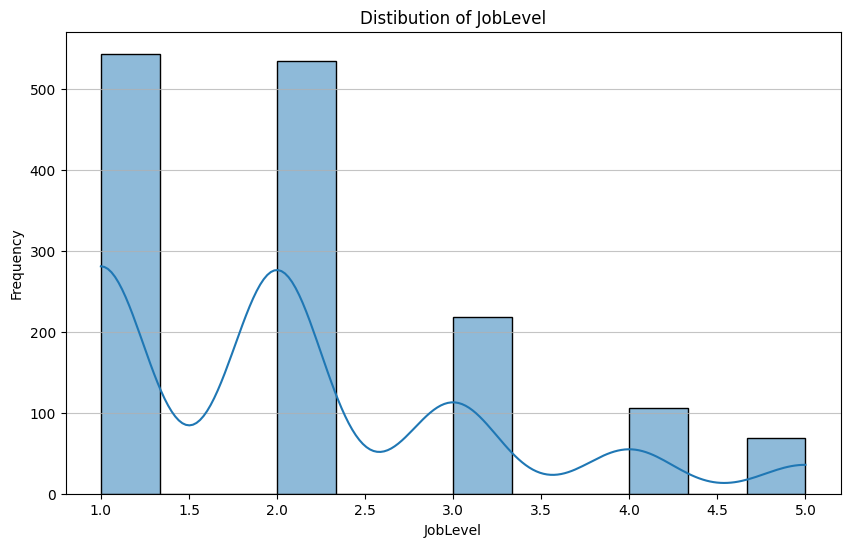

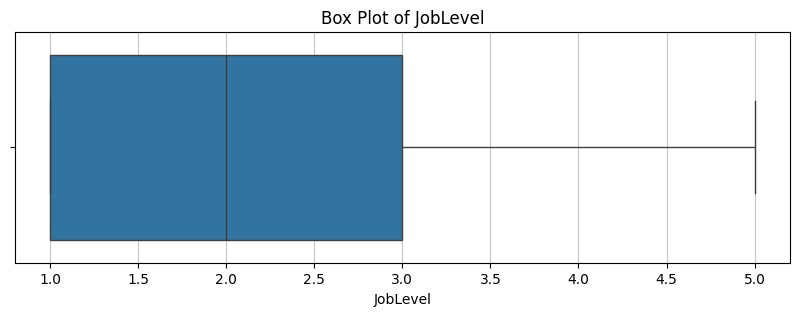

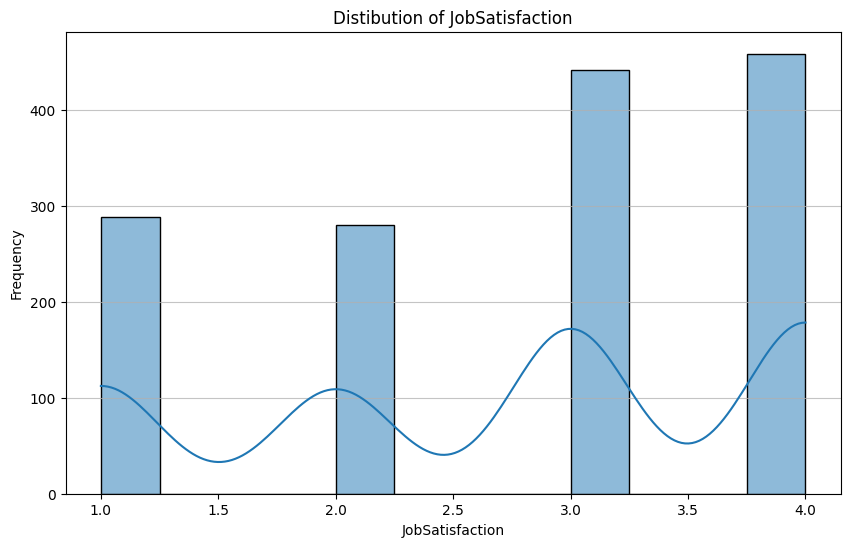

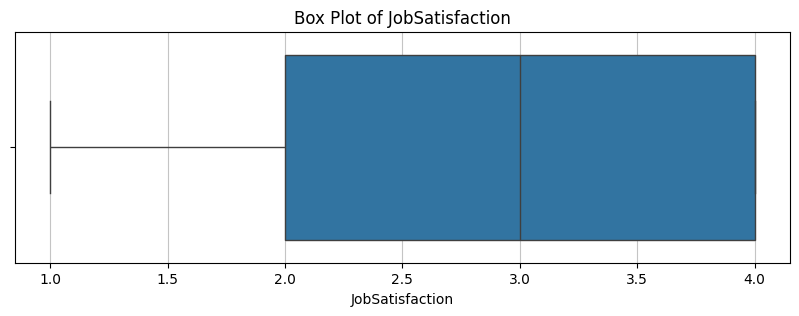

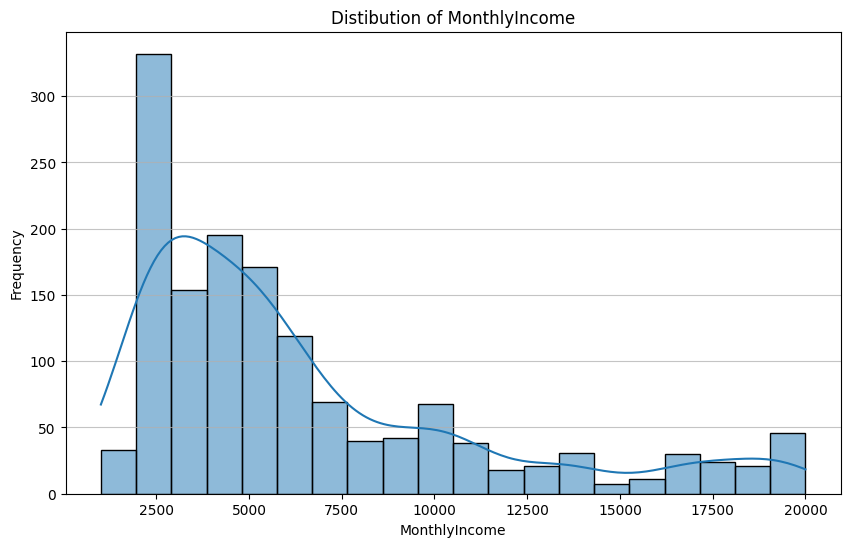

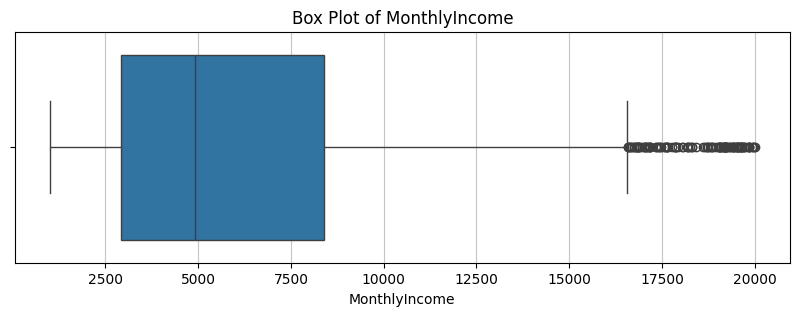

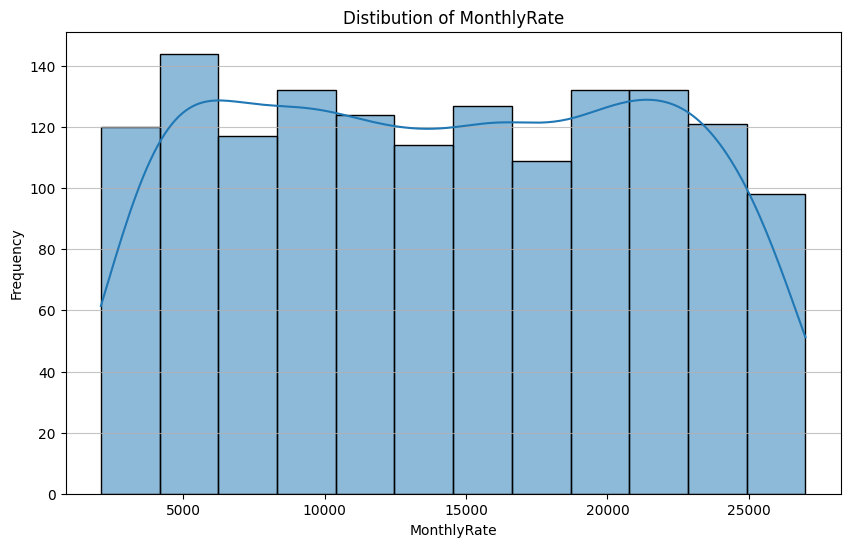

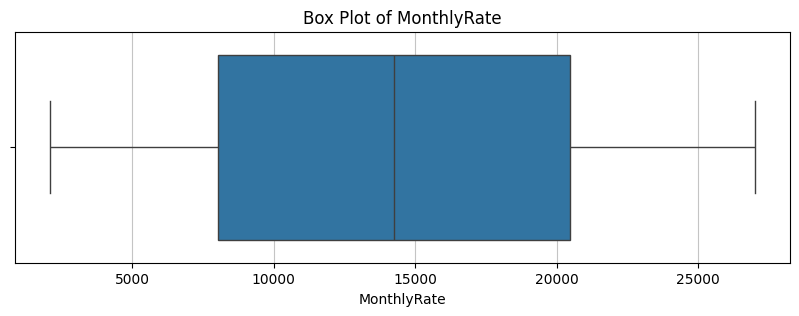

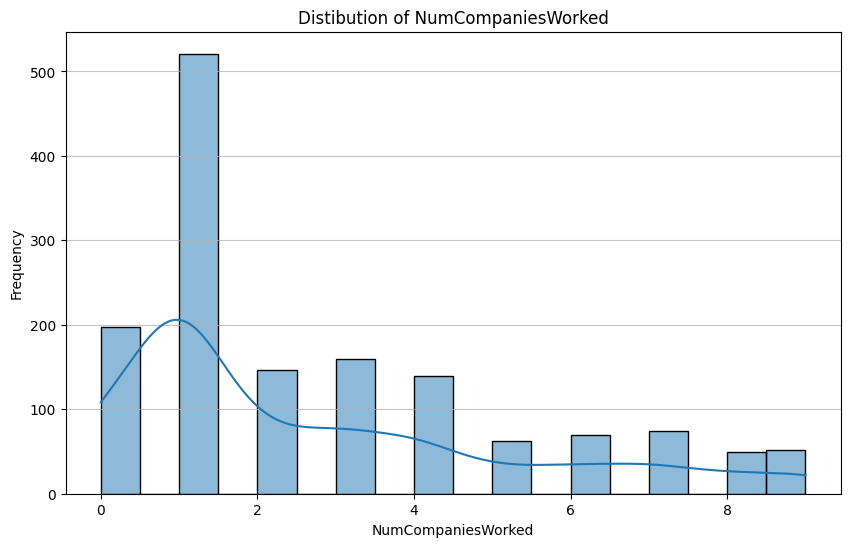

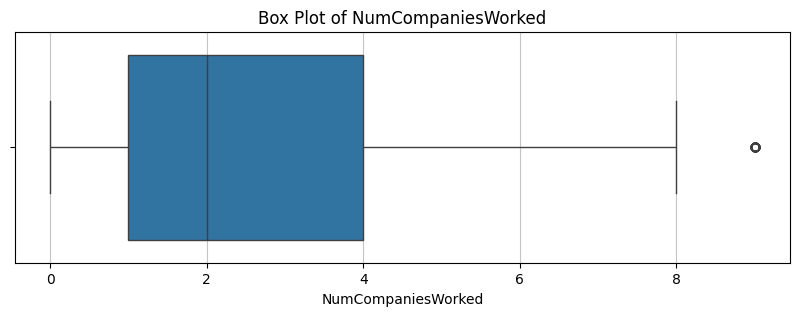

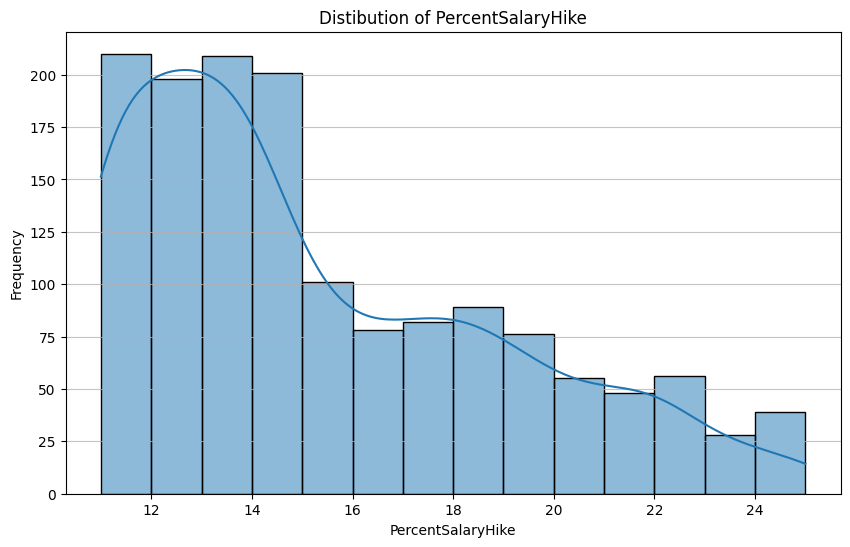

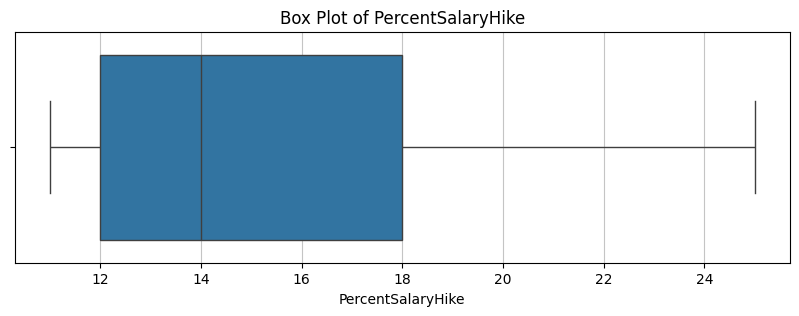

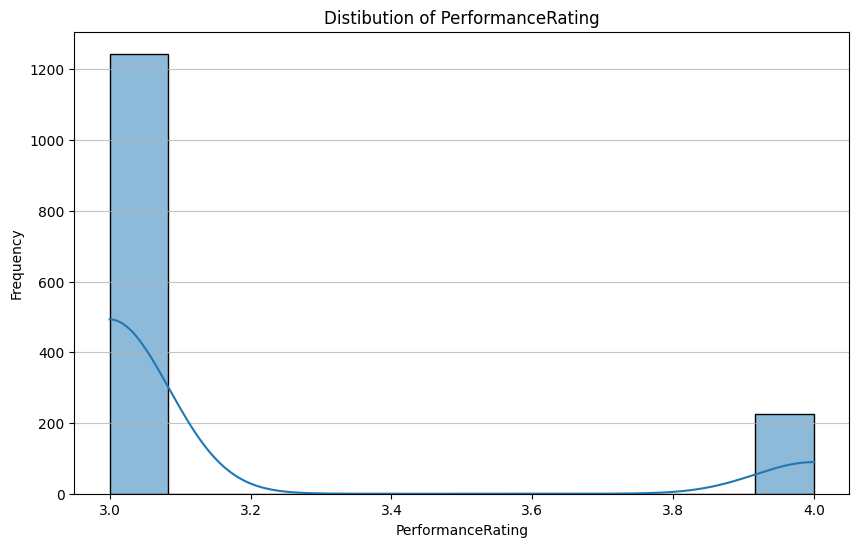

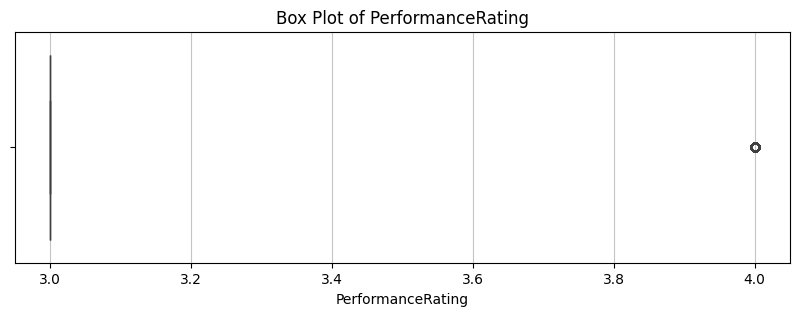

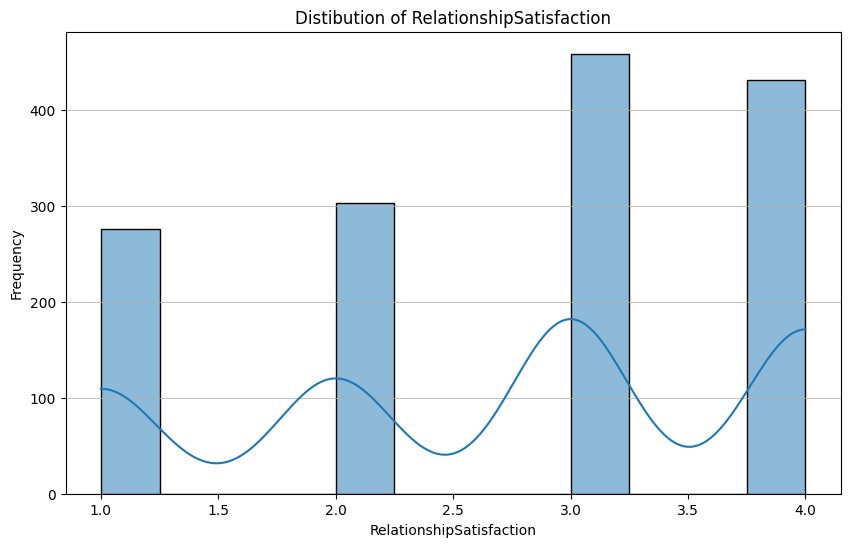

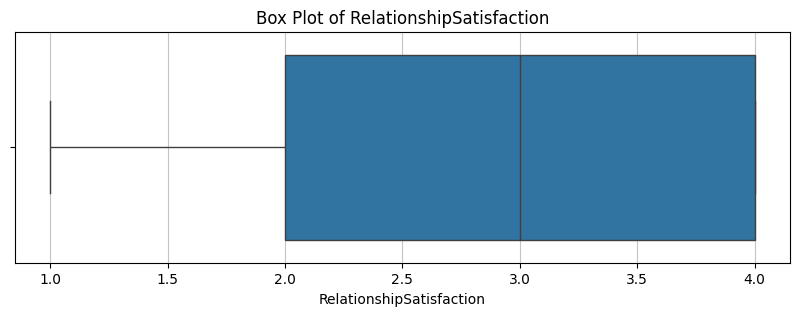

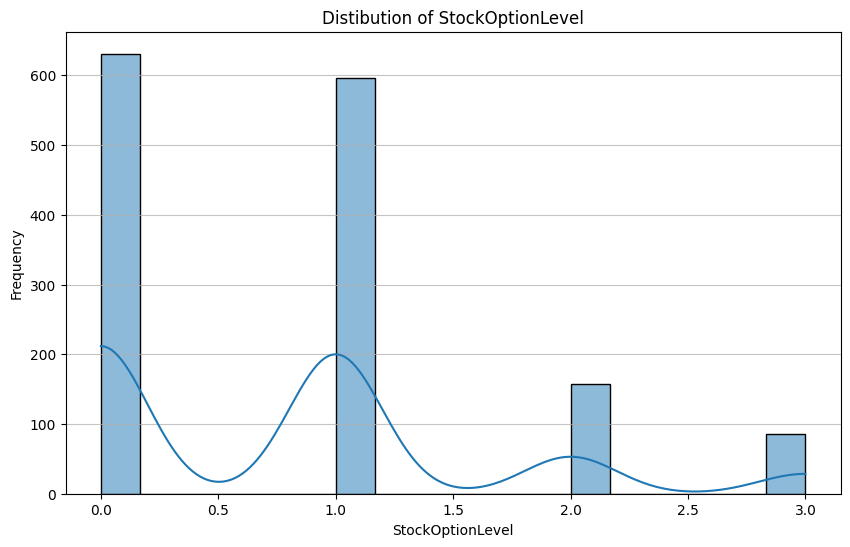

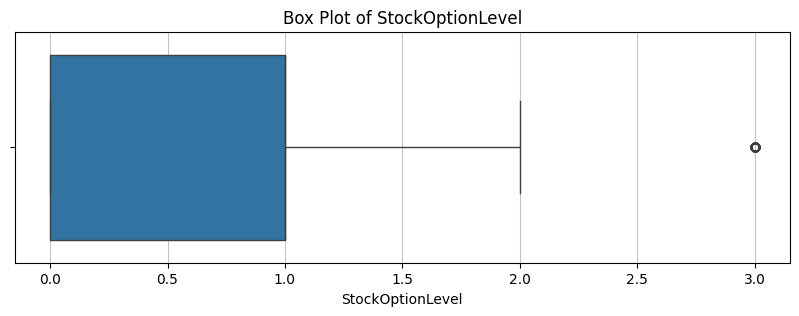

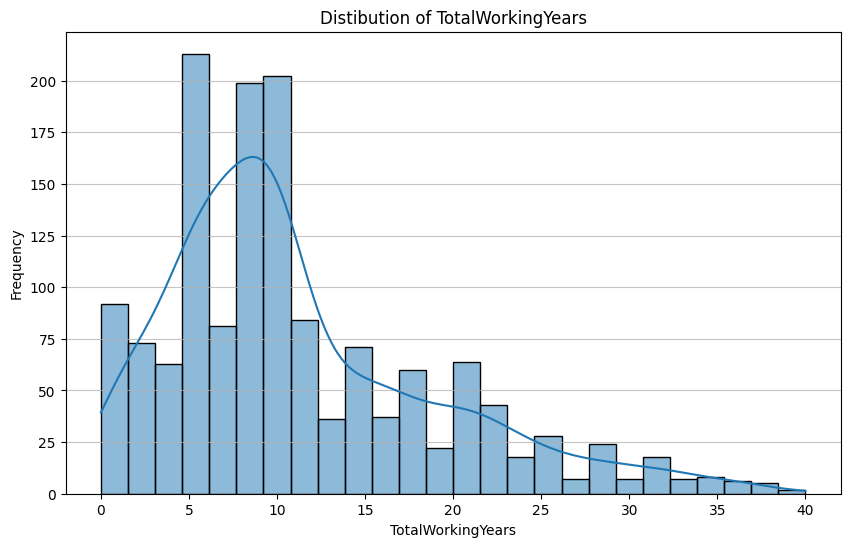

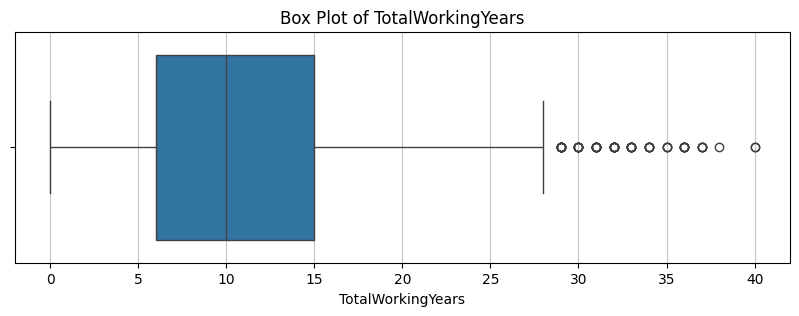

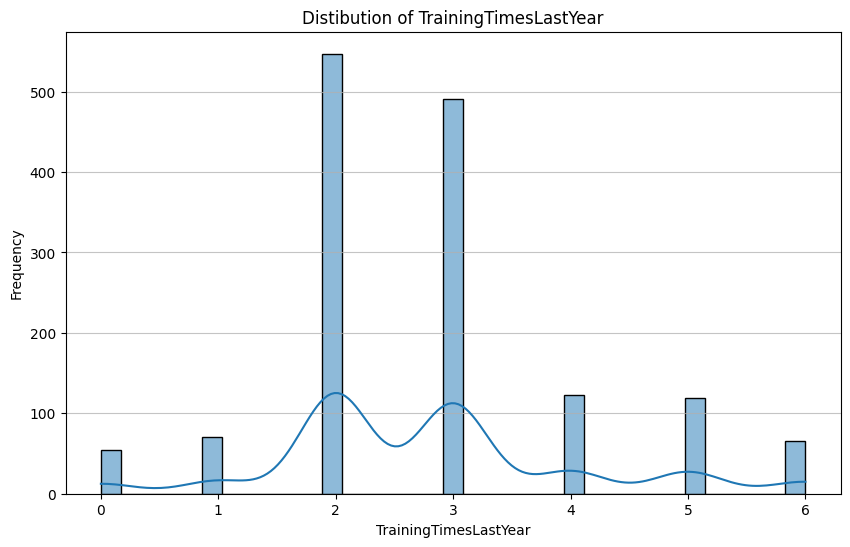

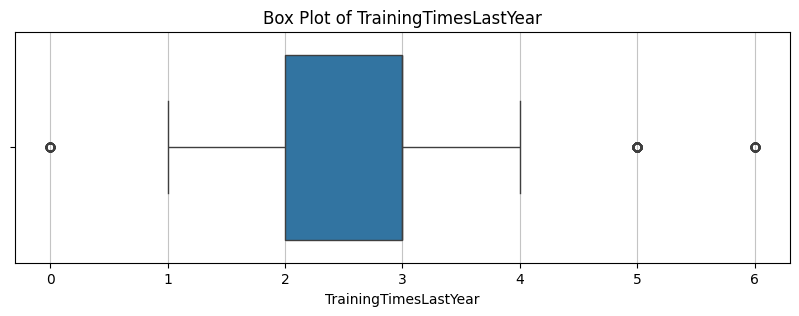

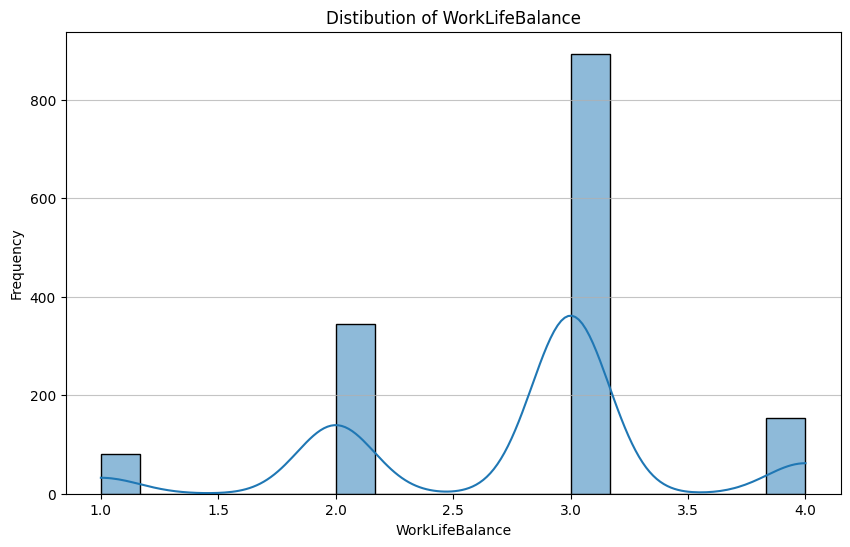

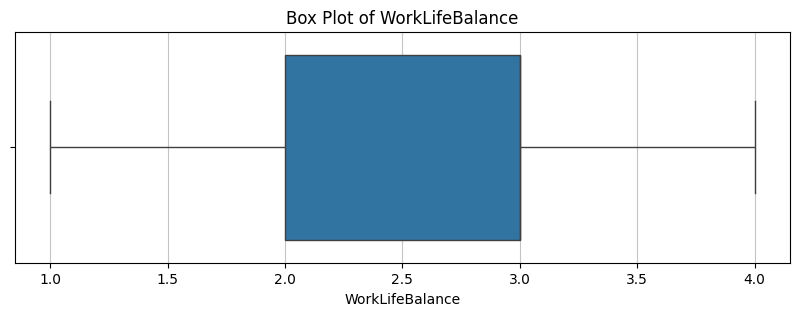

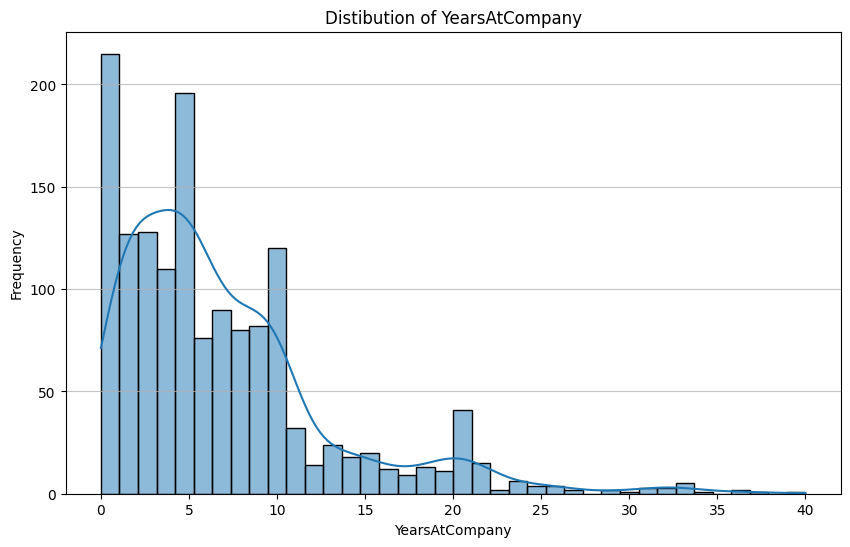

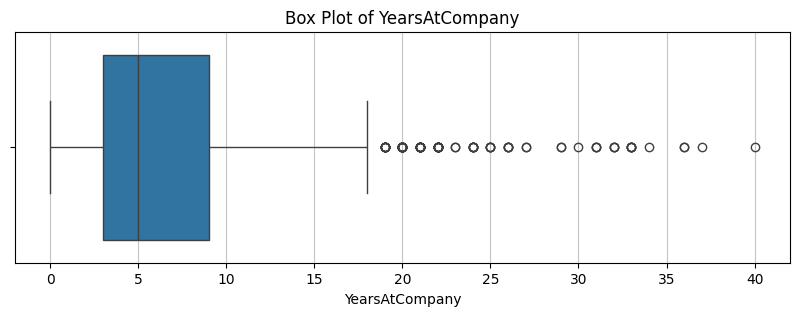

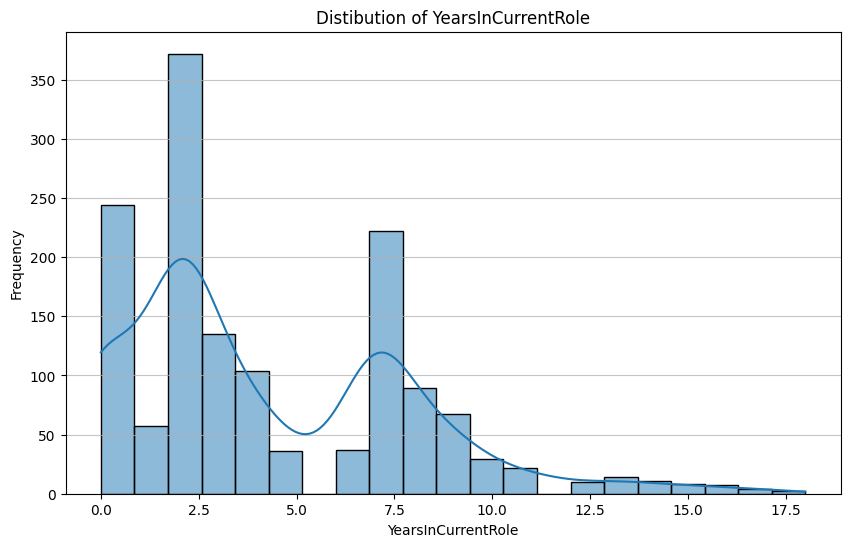

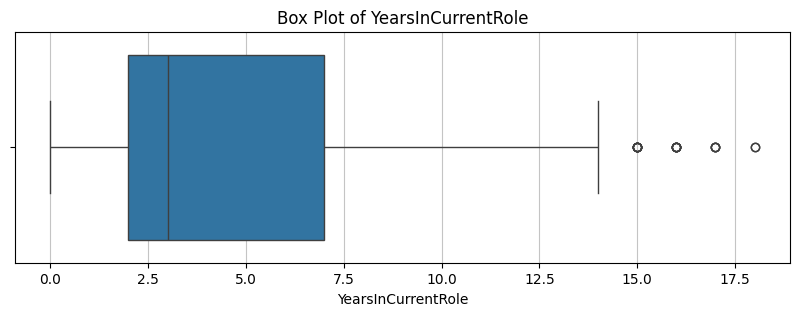

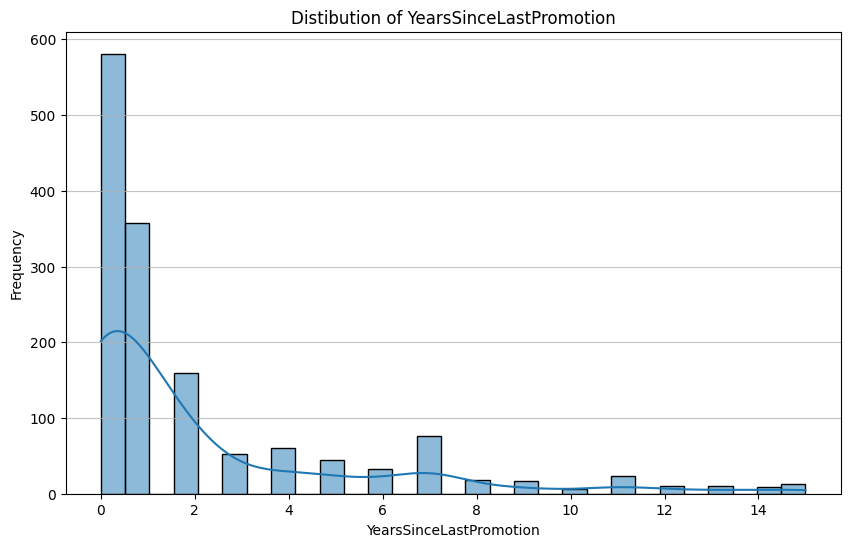

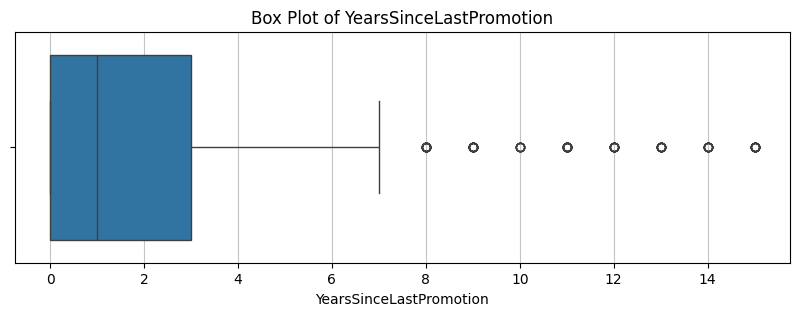

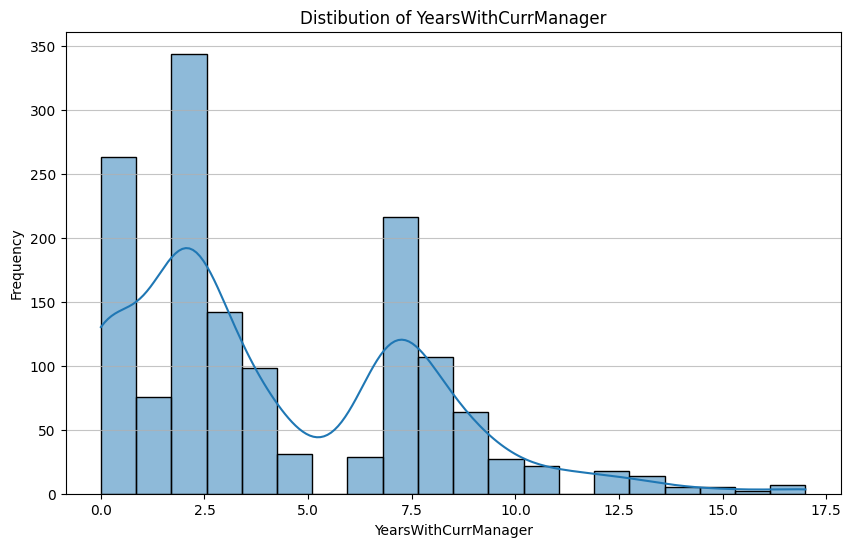

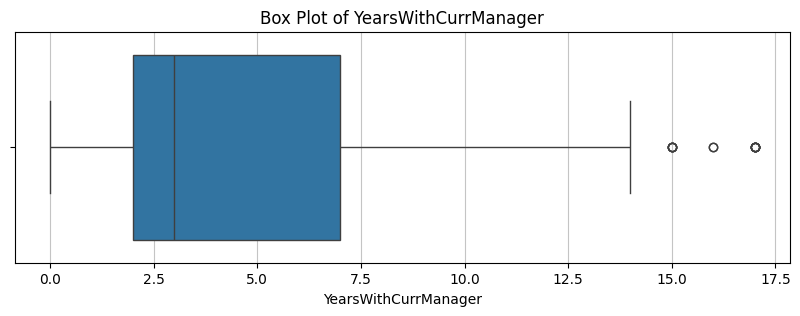

In [ ]:
for col in numerical_cols:
  # Histogram
  plt.figure(figsize=(10,6))
  sns.histplot(df[col], kde=True)
  plt.title(f'Distibution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.grid(axis='y',alpha=0.75)
  plt.show()

  #Box plot
  plt.figure(figsize=(10,3))
  sns.boxplot(x=df[col])
  plt.title(f'Box Plot of {col}')
  plt.xlabel(col)
  plt.grid(axis='x', alpha=0.75)
  plt.show()